# A/B Testing - Lab

## Introduction

In this lab, you'll go through the process of designing an experiment.

## Objectives
You will be able to:

* Design, structure, and run an A/B test


## The Scenario

You've been tasked with designing an experiment to test whether a new email template will be more effective for your company's marketing team. The current template has a 5% response rate (with standard deviation .0475), which has outperformed numerous other templates in the past. The company is excited to test the new design that was developed internally but nervous about losing sales if it is not to work out. As a result, they are looking to determine how many individuals they will need to serve the new email template in order to detect a 1% performance increase.


## Step 1: State the Null Hypothesis, $H_0$

State your null hypothesis here (be sure to make it quantitative as before)

In [1]:
# H_0 = 5% The new template will not have a 1% response rate.(response = 5%)
The null hypothesis is that there is no difference in the response rate between the two groups.

## Step 2: State the Alternative Hypothesis, $H_1$

State your alternative hypothesis here (be sure to make it quantitative as before)

In [ ]:
# H_1 >5 The new template will  have a 1% increase response rate ( response is not equal to 5but >5)
The alternative hypothesis is that there is a difference in response rate between the two groups

? metric to use
chi-test vs t-test 
detemine the effect size .

## Step 3: Calculate n for standard alpha and power thresholds

Now define what $\alpha$ and $\beta$ you believe might be appropriate for this scenario.
To start, arbitrarily set $\alpha$ to 0.05. From this, calculate the required sample size to detect a .01 response rate difference at a power of .8.

> Note: Be sure to calculate a normalized effect size using Cohen's d from the raw response rate difference.

In [2]:
import numpy as np
import pandas as pd
from statsmodels.stats.power import TTestIndPower, TTestPower
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid') # Nice background styling on plots

In [3]:
#Calculate effect size
#Cohen_d =(reponse rate difference)0.01/(std).0475
Cohen_d =0.01/.0475
print('The Cohen d effect size is' )
Cohen_d

The Cohen d effect size is


0.21052631578947367

Steps

Import libraries

Set significance level alpha= 0.05, power=0.8 

Calculate sample size

Calcualte power

Cohen d effect size 

In [4]:
# Calculate the required sample size using alpha ,, power and estimated effect size (the expected difference in response rate)
# Initiate power analysis
power_analysis= TTestIndPower()
sample_size =power_analysis.solve_power(effect_size = .01,alpha = 0.05, power  = .8, alternative ='two-sided')
print('The required sample size is   ')
round(sample_size)

The required sample size is   


156978

The power analysis determined a sample size of 156978 for each group

In [5]:
# power analysis 
nobs1= sample_size 
power = power_analysis.solve_power(effect_size = .01,alpha = 0.05, nobs1= 156978)

power

0.7999995681517585

The power for hypothesis testing is 0.8

In [6]:
# Calculate minimum effect size to satisfy desired alpha and power as well as respect sample size limitations
power_analysis.solve_power(nobs1=156978, alpha=.05, power=.8)

0.010000451900488785

The minimum effect size to satisfy the sample size of 156978  and alpha of .05 is .01

In [7]:
#Calculate effect size
#Cohen_d =(reponse rate difference)0.01/(std).0475
Cohen_d =0.01/.0475
print('The Cohen d effect size is' )
Cohen_d

The Cohen d effect size is


0.21052631578947367

In [8]:
#using Cohen d effect size 
power_analysis= TTestIndPower()
sample_size =power_analysis.solve_power(effect_size = .21,alpha = 0.05, power  = .8, alternative ='two-sided')
print('Using the Cohen d effect size the required sample size is   ')
round(sample_size)

Using the Cohen d effect size the required sample size is   


357

In [9]:
# using cohen d effect size power analysis 
nobs1= sample_size 
power = power_analysis.solve_power(effect_size = .21, alpha = 0.05, nobs1= 357)

power

0.8000877861787077

In [10]:
# Using the Cohen d effect size
# Calculate minimum effect size to satisfy desired alpha and power as well as respect sample size limitations
power_analysis.solve_power(nobs1=357, alpha=.05, power=.8)

0.20997625118312355

The minimum effect size to satisfy the sample size of 357  and alpha of .05 is 0.2

## Step 4: Plot Power Curves for Alternative Experiment Formulations

While you now know how many observations you need in order to run a t-test for the given formulation above, it is worth exploring what sample sizes would be required for alternative test formulations. For example, how much does the required sample size increase if you put the more stringent criteria of $\alpha=.01$? Or what is the sample size required to detect a .03 response rate difference at the same $\alpha$ and power thresholds? To investigate this, plot power vs sample size curves for alpha values of .01, .05 and .1 along with varying response rate differences of .005, .01, .02 and .03.

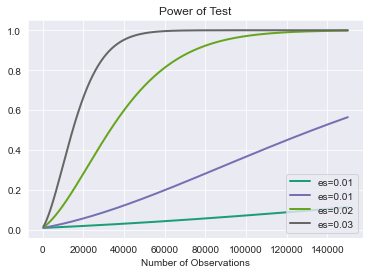

In [11]:
#Your code; plot power curves for the various alpha and effect size combinations
power_analysis.plot_power(dep_var='nobs',
                          nobs = np.array(range(350,150000)),
                          effect_size=np.array([.005, .01, .02,.03]),
                          alpha=.01)
plt.show()

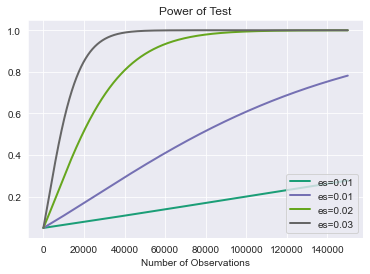

In [12]:
#Your code; plot power curves for the various alpha and effect size combinations
power_analysis.plot_power(dep_var='nobs',
                          nobs = np.array(range(5,150000)),
                          effect_size=np.array([.005, .01, .02,.03]),
                          alpha=.05)
plt.show()

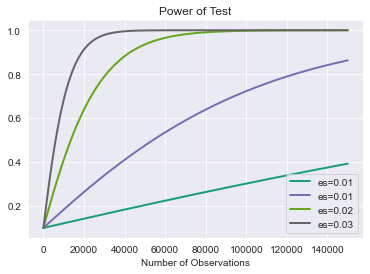

In [13]:
#Your code; plot power curves for the various alpha and effect size combinations
power_analysis.plot_power(dep_var='nobs',
                          nobs = np.array(range(5,150000)),
                          effect_size=np.array([.005, .01, .02,.03]),
                          alpha=.1)
plt.show()

## Step 5: Propose a Final Experimental Design

Finally, now that you've explored some of the various sample sizes required for statistical tests of varying power, effect size and type I errors, propose an experimental design to pitch to your boss and some of the accompanying advantages or disadvantages with it.

### Your answer here

In [14]:
Data nominal and the comparsion of mean response templates. Large sample size. Standard deviation known rate from two groups using 2 different email templates. 
The first group will be send emails using the 
the traditional email template and the scecond group the new email template that is hypothesized as having a higher response rate.
To conduct the z-test customers will be randomly assigned to the two groups . 
The sample mean and standard deviation for each group calculated.

SyntaxError: invalid syntax (<ipython-input-14-d38bc7806b68>, line 1)

## Summary

In this lab, you practiced designing an initial experiment and then refined the parameters of the experiment based on an initial sample to determine feasibility.